<a href="https://colab.research.google.com/github/malumisa/test/blob/main/Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# additions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score

In [2]:
# Load the data
df = pd.read_csv("/content/Result_Protein_Peptide_Combine.csv")

In [3]:
df.head()

,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,On,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,...,62329,62437,62723,62732,62792,63875,63889,64669,64674,65043
0,0,10.0,6.0,15.0,0.0,0,8984260.0,53855.6,8579740.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,6,8.0,10.0,34.0,0.0,0,8279770.0,45251.9,8655890.0,49927.5,...,0,0,0,0,0,0,0,0,0,0
2,12,10.0,10.0,41.0,0.0,1,8382390.0,53000.9,8995640.0,45519.2,...,0,0,0,0,0,0,0,0,0,0
3,36,17.0,18.0,51.0,0.0,1,10671500.0,58108.4,9985420.0,52374.0,...,0,0,0,0,0,0,0,0,0,0
4,6,8.0,2.0,21.0,0.0,0,6177730.0,42682.6,3596660.0,25698.8,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Define the target and feature variables
df['sum_score'] = df[df.filter(regex='updrs').columns].sum(axis=1)
df.drop(df.filter(regex='updrs').columns, axis=1,inplace =True)
target_variable = ['sum_score']
# target_variable = ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']
feature_variables = [x for x in df.columns if x != target_variable]

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[feature_variables], df[target_variable], test_size=0.2, random_state=1)


In [8]:
# Create a Random Forest classifier instance
rf = RandomForestClassifier(n_estimators=2000, max_depth=10, min_samples_split=5, min_samples_leaf=3,random_state=1)

In [ ]:
# Train the Random Forest classifier on the training data
#rf.fit(X_train, y_train)

In [14]:
# Train a separate Random Forest classifier for each target variable
models = {}
for target in target_variable:
    model = RandomForestClassifier(n_estimators=1000, max_depth=10, min_samples_split=5, min_samples_leaf=3,random_state=1)
    model.fit(X_train, y_train[target])
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test[target], y_pred, average='weighted')
    print("F1 score for {} = {}".format(target, f1))
    models[target] = model

F1 score for sum_score = 1.0


In [ ]:
# Make predictions on the testing data
y_pred = rf.predict(X_test)

In [15]:
# Calculate the accuracy score
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.0


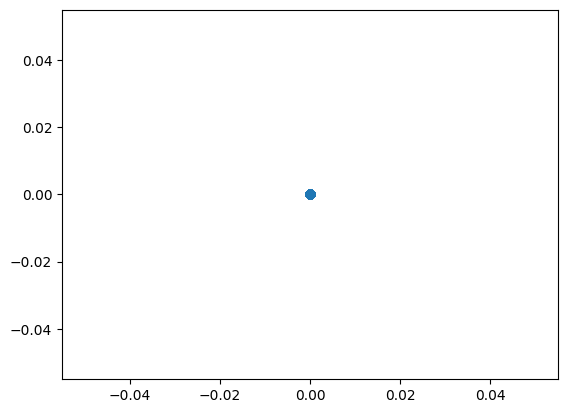

In [19]:
plt.scatter(y_pred, y_test)

In [11]:
# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0


In [ ]:
# Assuming y_pred and y_test are both arrays of shape (n_samples, n_classes)
# f1_scores = []
# for i in range(y_test.shape[1]):
#     f1 = f1_score(y_test[:,i], y_pred[:,i], average='weighted')
#     f1_scores.append(f1)

# mean_f1 = sum(f1_scores) / len(f1_scores)

# print(f"Mean F1 score: {mean_f1}")

In [12]:
# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[214]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       214

    accuracy                           1.00       214
   macro avg       1.00      1.00      1.00       214
weighted avg       1.00      1.00      1.00       214

